In [18]:
#Pulling data from the CrytoMarketCapAPI
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-07-04T01:49:39.742Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 9966}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9598, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [ ]:
#Importing libraries
import pandas as pd
import os

In [33]:
type(data)


pd.set_option('display.max_columns', None)


In [20]:
#Normalising the json data and adding a timestamp to the data frame
df=pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9598,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.908450e+07,1.908450e+07,NaN,1,NaN,NaN,None,2022-07-04T01:48:00.000Z,19179.026986,1.679893e+10,-1.3590,-0.378753,-0.019247,-8.947418,-35.183495,-51.652748,-58.837691,3.660221e+11,42.0620,4.027596e+11,None,2022-07-04T01:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-04 01:49:47.905667
1,1027,Ethereum,ETH,ethereum,5797,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.214008e+08,1.214008e+08,NaN,2,NaN,NaN,None,2022-07-04T01:47:00.000Z,1069.890064,8.730001e+09,-5.8639,-0.134325,1.197168,-11.700712,-39.311331,-63.671487,-69.561763,1.298855e+11,14.9260,1.298855e+11,None,2022-07-04T01:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-04 01:49:47.905667
2,825,Tether,USDT,tether,35540,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.608154e+10,6.816037e+10,NaN,3,NaN,NaN,None,2022-07-04T01:47:00.000Z,0.999062,2.853967e+10,-4.3629,-0.001171,0.009804,-0.048423,-0.003576,-0.102485,-0.121523,6.601955e+10,7.5867,6.809643e+10,None,2022-07-04T01:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-04 01:49:47.905667
3,3408,USD Coin,USDC,usd-coin,4746,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.580261e+10,5.580261e+10,NaN,4,NaN,NaN,None,2022-07-04T01:47:00.000Z,1.000061,3.627284e+09,-5.4878,-0.036675,-0.029081,-0.020300,0.005931,0.011196,0.048547,5.580601e+10,6.4130,5.580601e+10,None,2022-07-04T01:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-04 01:49:47.905667
4,1839,BNB,BNB,bnb,986,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,None,2022-07-04T01:47:00.000Z,218.300523,7.401762e+08,5.5133,-0.215911,0.757575,-7.058251,-26.441053,-45.946787,-51.472463,3.564345e+10,4.0960,3.604508e+10,None,2022-07-04T01:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-04 01:49:47.905667
5,4687,Binance USD,BUSD,binance-usd,3955,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.754722e+10,1.754722e+10,NaN,6,NaN,NaN,None,2022-07-04T01:47:00.000Z,1.001536,3.787063e+09,2.3665,0.044267,0.032637,0.292164,0.140833,0.097224,0.156286,1.757418e+10,2.0196,1.757418e+10,None,2022-07-04T01:47:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-04 01:49:47.905667
6,52,XRP,XRP,xrp,749,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,None,2022-07-04T01:48:00.000Z,0.323452,7.625706e+08,31.6800,0.162626,3.164538,-11.256757,-16.747199,-50.450268,-60.927940,1.563669e+10,1.7969,3.234524e+10,None,2022-07-04T01:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-04 01:49:47.905667
7,2010,Cardano,ADA,cardano,504,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.427770e+10,NaN,8,NaN,NaN,None,2022-07-04T01:47:00.000Z,0.452809,4.489494e+08,-4.7087,-0.309804,0.210839,-8.571242,-18.288625,-49.427661,-62.701288,1.527733e+10,1.7556,2.037640e+10,None,2022-07-04T01:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-04 01:49:47.905667
8,5426,Solana,SOL,solana,344,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.434340e+08,5.116169e+08,NaN,9,

In [37]:
#Created a function that pulls data from the website using its API and creates a file
#if not created in my folder and saves it as a csv

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'da37e937-a4ad-44b9-b71f-5f48c7beda2a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df=pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\i\Documents\cryptoapi\marketcap.csv'):
         df.to_csv(r'C:\Users\i\Documents\cryptoapi\marketcap.csv', header='column_names')
    else:
         df.to_csv(r'C:\Users\i\Documents\cryptoapi\marketcap.csv', mode = 'a' ,header=False)
    

In [38]:
#Created a loop that runs the function

from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API running completed successfully!")
    sleep(60) #Sleep for one minute
exit()

API running completed successfully!
API running completed successfully!
API running completed successfully!
API running completed successfully!
API running completed successfully!
API running completed successfully!
API running completed successfully!
HTTPSConnectionPool(host='pro-api.coinmarketcap.com', port=443): Max retries exceeded with url: /v1/cryptocurrency/listings/latest?start=1&limit=15&convert=USD (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000244FBA2BE80>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))


UnboundLocalError: local variable 'data' referenced before assignment

In [73]:
df1=pd.read_csv(r'C:\Users\i\Documents\cryptoapi\marketcap.csv')
df1

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9598,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19084612.00000,19084612.00000,nan,1,nan,nan,nan,2022-07-04T02:22:00.000Z,19219.97401,16849895955.07792,-0.39490,0.17887,0.04643,-8.86823,-34.86090,-51.56770,-58.81516,366805746556.06110,42.07490,403619454127.60999,nan,2022-07-04T02:22:00.000Z,nan,NaN,NaN,NaN,NaN,2022-07-04 02:22:40.942486
1,1,1027,Ethereum,ETH,ethereum,5797,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",nan,121401866.87400,121401866.87400,nan,2,nan,nan,nan,2022-07-04T02:22:00.000Z,1072.71023,8708023016.45045,-5.44270,0.18047,1.32530,-11.68137,-38.88728,-63.60731,-69.55382,130229025118.44725,14.93810,130229025118.45000,nan,2022-07-04T02:22:00.000Z,nan,NaN,NaN,NaN,NaN,2022-07-04 02:22:40.942486
2,2,825,Tether,USDT,tether,35540,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",nan,66081540012.39425,68160365339.33807,nan,3,nan,nan,nan,2022-07-04T02:22:00.000Z,0.99910,28550883750.99401,-3.63670,0.00247,0.01469,-0.04076,0.00240,-0.09011,-0.11964,66022085893.00031,7.57310,68099040883.25000,nan,2022-07-04T02:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-04 02:22:40.942486
3,3,3408,USD Coin,USDC,usd-coin,4746,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",nan,55802605112.71548,55802605112.71548,nan,4,nan,nan,nan,2022-07-04T02:21:00.000Z,1.00010,3656132664.08814,-2.88620,-0.02586,0.00793,-0.04223,0.01835,0.01902,0.00982,55808291118.59121,6.40160,55808291118.59000,nan,2022-07-04T02:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-04 02:22:40.942486
4,4,1839,BNB,BNB,bnb,986,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",165116760.00000,163276974.63000,163276974.63000,nan,5,nan,nan,nan,2022-07-04T02:21:00.000Z,218.43298,739497731.39503,6.39720,0.04228,0.51048,-7.09333,-26.34716,-45.86764,-51.74741,35665075391.70296,4.09100,36066945184.27000,nan,2022-07-04T02:21:00.000Z,nan,NaN,NaN,NaN,NaN,2022-07-04 02:22:40.942486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,10,4943,Dai,DAI,multi-collateral-dai,1016,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'ethereum-ecosystem', '...",nan,6895358568.66191,6895358568.66191,nan,11,nan,nan,nan,2022-07-04T02:28:00.000Z,0.99981,149642505.61350,-21.06980,-0.02416,0.02996,-0.02726,0.02108,-0.02682,-0.04680,6894035230.65245,0.79150,6894035230.65000,nan,2022-07-04T02:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-07-04 02:28:46.027281
101,11,6636,Polkadot,DOT,polkadot-new,359,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",nan,987579314.95709,1103303471.38227,nan,12,904869778.00000,6168012894.84877,nan,2022-07-04T02:28:00.000Z,6.81646,285947249.00000,-13.22590,-0.17269,0.53248,-14.01607,-25.81238,-58.19240,-70.37508,6731799533.41442,0.77280,7520629159.99000,nan,2022-07-04T02:28:00.000Z,nan,NaN,NaN,NaN,NaN,2022-07-04 02:28:46.027281
102,12,1958,TRON,TRX,tron,650,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'bnb-c...",nan,92488806126.29007,92488801180.04128,nan,13,716

In [40]:
#Changed the decimal points to 5 decimal points
pd.set_option("display.float_format", lambda x: '%.5f' %x)

In [71]:
df.count()

id                                    15
name                                  15
symbol                                15
slug                                  15
num_market_pairs                      15
date_added                            15
tags                                  15
max_supply                             4
circulating_supply                    15
total_supply                          15
platform                               0
cmc_rank                              15
self_reported_circulating_supply       2
self_reported_market_cap               2
tvl_ratio                              0
last_updated                          15
quote.USD.price                       15
quote.USD.volume_24h                  15
quote.USD.volume_change_24h           15
quote.USD.percent_change_1h           15
quote.USD.percent_change_24h          15
quote.USD.percent_change_7d           15
quote.USD.percent_change_30d          15
quote.USD.percent_change_60d          15
quote.USD.percen

In [42]:
#Grouped all the mactching crypto

df3=df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.04221,-0.21529,-8.97565,-34.99659,-51.65825,-58.86217
Ethereum,0.01904,1.00691,-11.84187,-39.01533,-63.68514,-69.61124
Tether,-0.00296,0.01116,-0.04038,0.00311,-0.09172,-0.11107
USD Coin,-0.01610,-0.01860,-0.03242,-0.02229,-0.00665,0.01412
BNB,-0.10173,0.23582,-7.24760,-26.23038,-45.95476,-51.86068
Binance USD,-0.10990,-0.04336,0.06665,-0.16984,-0.16020,-0.15089
XRP,-0.15095,2.49549,-11.36853,-16.64856,-50.53085,-61.18830
Cardano,-0.28121,-0.39602,-9.22498,-17.75106,-49.34471,-62.87697
Solana,0.14751,1.30892,-15.90936,-8.69973,-64.39439,-74.80512


In [79]:
#Stacked the columns into rows
df4=df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h      0.04221
           quote.USD.percent_change_24h    -0.21529
           quote.USD.percent_change_7d     -8.97565
           quote.USD.percent_change_30d   -34.99659
           quote.USD.percent_change_60d   -51.65825
                                             ...   
Shiba Inu  quote.USD.percent_change_24h     0.06390
           quote.USD.percent_change_7d    -11.16865
           quote.USD.percent_change_30d    -5.45382
           quote.USD.percent_change_60d   -53.61239
           quote.USD.percent_change_90d   -62.56236
Length: 90, dtype: float64

In [47]:
#Chnaged from a series to a dataframe

df5=df4.to_frame(name='values')
df5

values
name                                            
Bitcoin   quote.USD.percent_change_1h    0.04221
          quote.USD.percent_change_24h  -0.21529
          quote.USD.percent_change_7d   -8.97565
          quote.USD.percent_change_30d -34.99659
          quote.USD.percent_change_60d -51.65825
...                                          ...
Shiba Inu quote.USD.percent_change_24h   0.06390
          quote.USD.percent_change_7d  -11.16865
          quote.USD.percent_change_30d  -5.45382
          quote.USD.percent_change_60d -53.61239
          quote.USD.percent_change_90d -62.56236

[90 rows x 1 columns]

In [55]:
#Indexed the dataframe

index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.04221
1,Bitcoin,quote.USD.percent_change_24h,-0.21529
2,Bitcoin,quote.USD.percent_change_7d,-8.97565
3,Bitcoin,quote.USD.percent_change_30d,-34.99659
4,Bitcoin,quote.USD.percent_change_60d,-51.65825
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,0.06390
86,Shiba Inu,quote.USD.percent_change_7d,-11.16865
87,Shiba Inu,quote.USD.percent_change_30d,-5.45382
88,Shiba Inu,quote.USD.percent_change_60d,-53.61239


In [59]:
#Renamed a column

df7=df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.04221
1,Bitcoin,quote.USD.percent_change_24h,-0.21529
2,Bitcoin,quote.USD.percent_change_7d,-8.97565
3,Bitcoin,quote.USD.percent_change_30d,-34.99659
4,Bitcoin,quote.USD.percent_change_60d,-51.65825
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,0.06390
86,Shiba Inu,quote.USD.percent_change_7d,-11.16865
87,Shiba Inu,quote.USD.percent_change_30d,-5.45382
88,Shiba Inu,quote.USD.percent_change_60d,-53.61239


In [60]:
#Replaced the row name

df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.04221
1,Bitcoin,24h,-0.21529
2,Bitcoin,7d,-8.97565
3,Bitcoin,30d,-34.99659
4,Bitcoin,60d,-51.65825
...,...,...,...
85,Shiba Inu,24h,0.06390
86,Shiba Inu,7d,-11.16865
87,Shiba Inu,30d,-5.45382
88,Shiba Inu,60d,-53.61239


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt


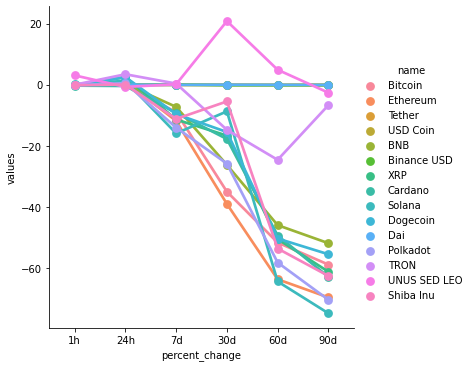

In [61]:
sns.catplot(x='percent_change', y='values', hue='name', data =df7, kind='point')

In [75]:
df8=df1[['name','quote.USD.price','timestamp']]
df8=df8.query("name=='Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,19219.97401,2022-07-04 02:22:40.942486
15,Bitcoin,19219.97401,2022-07-04 02:23:42.113711
30,Bitcoin,19210.87955,2022-07-04 02:24:42.618394
45,Bitcoin,19210.87955,2022-07-04 02:25:43.526015
60,Bitcoin,19193.42422,2022-07-04 02:26:44.427248
75,Bitcoin,19193.42422,2022-07-04 02:27:45.126105
90,Bitcoin,19179.40756,2022-07-04 02:28:46.027281


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

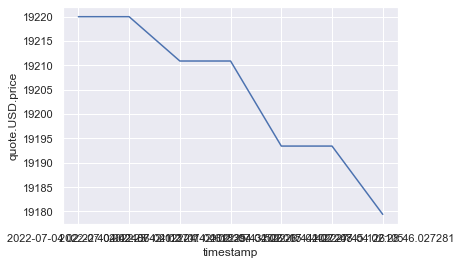

In [78]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp',y='quote.USD.price',data=df8)